In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/MyDrive/楊禹浩/bank-full.csv'
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical = pd.read_csv(file_path, usecols=categorical_columns,sep=';' )
dummied_new_df=pd.get_dummies(categorical,columns=categorical_columns)
dummied_new_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


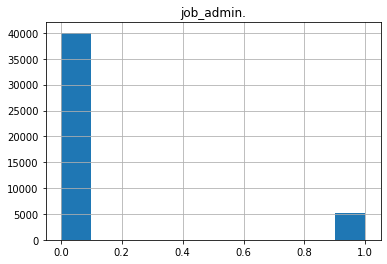

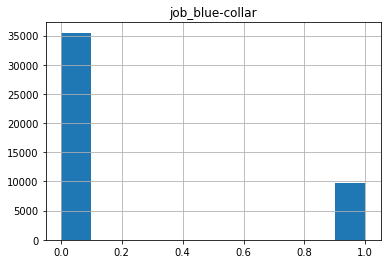

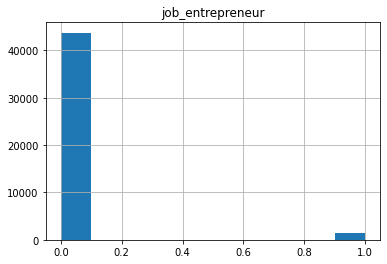

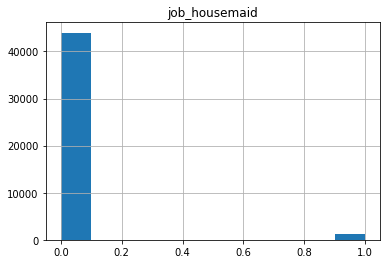

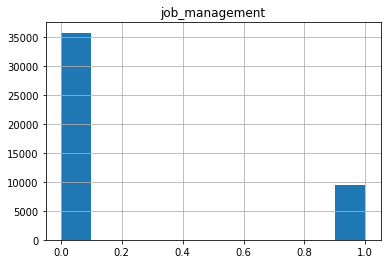

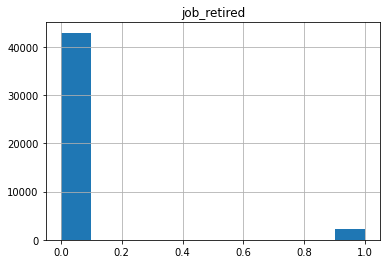

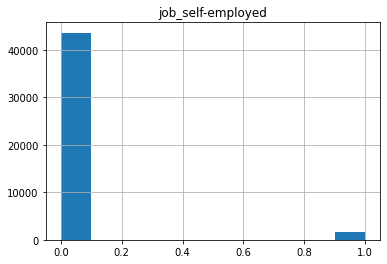

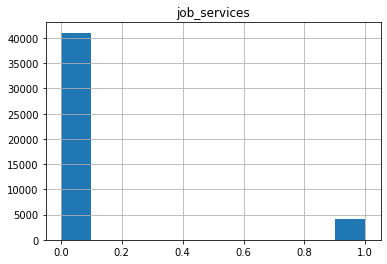

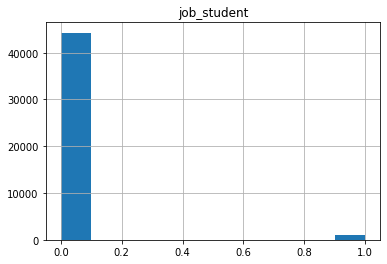

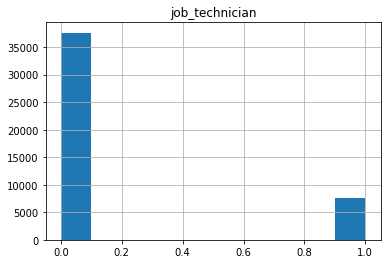

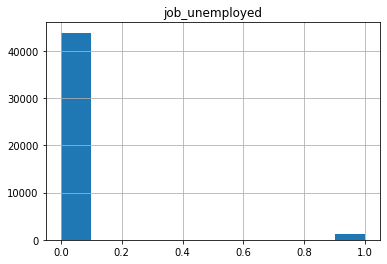

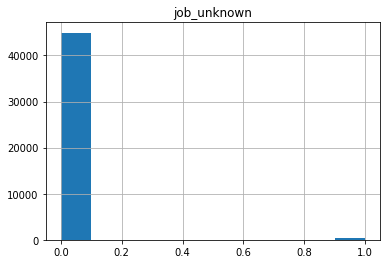

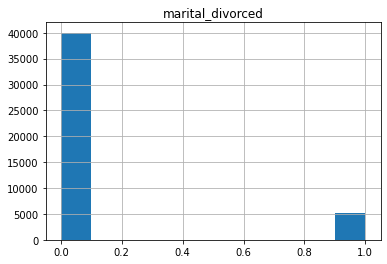

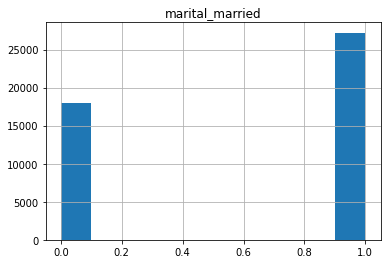

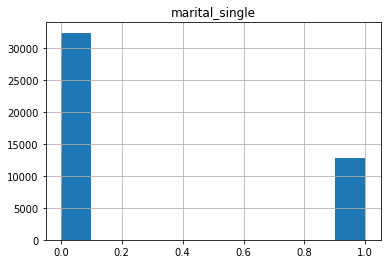

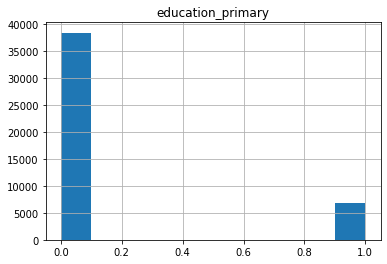

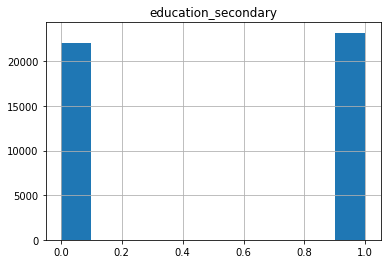

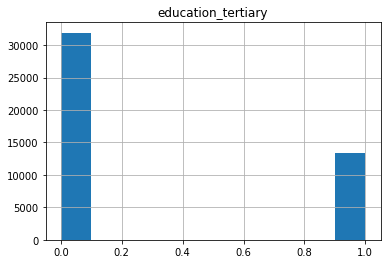

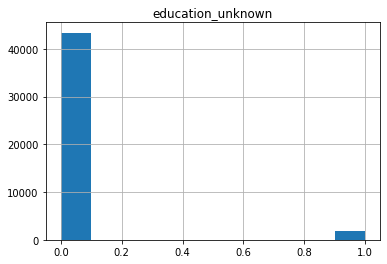

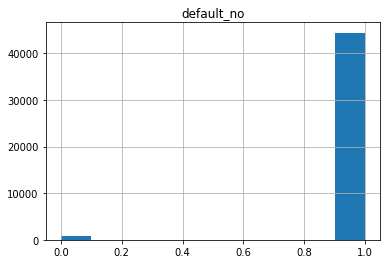

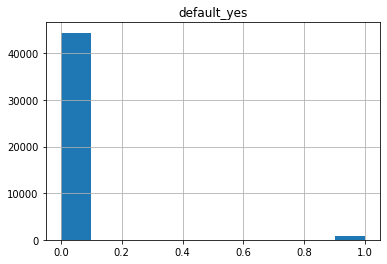

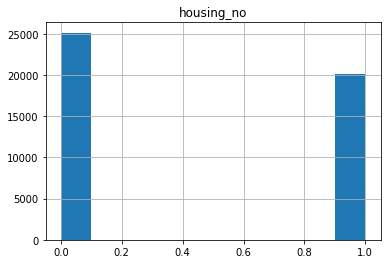

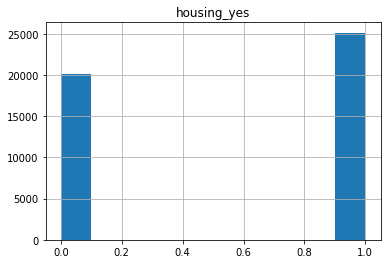

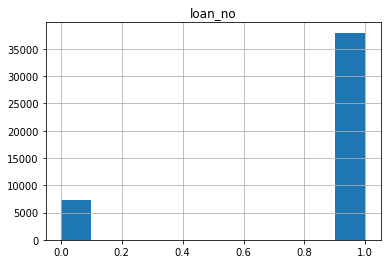

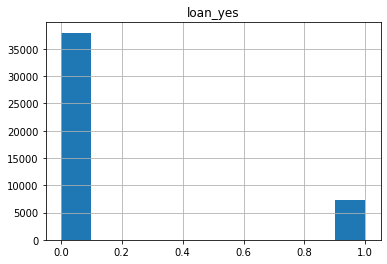

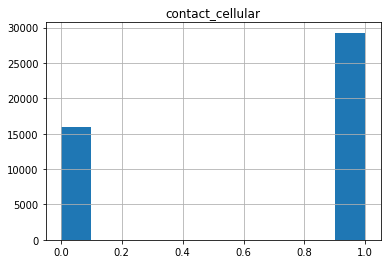

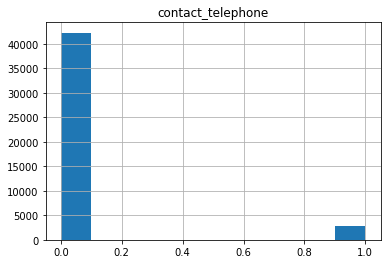

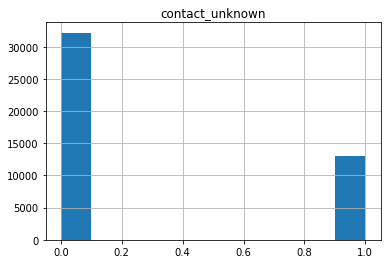

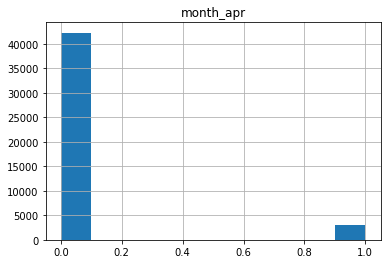

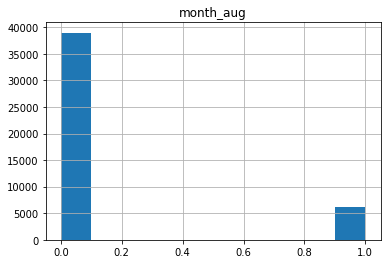

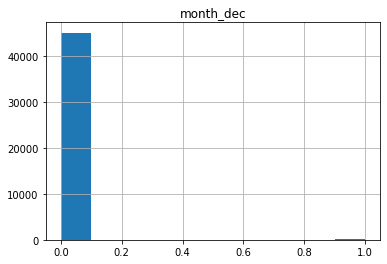

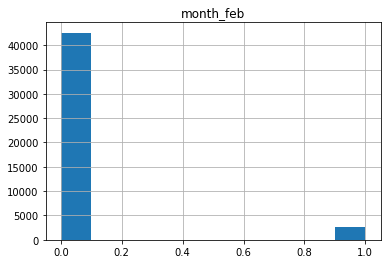

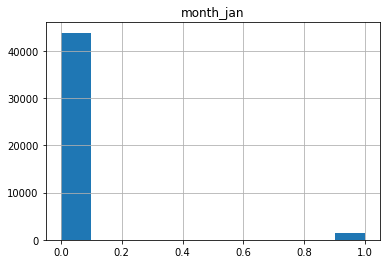

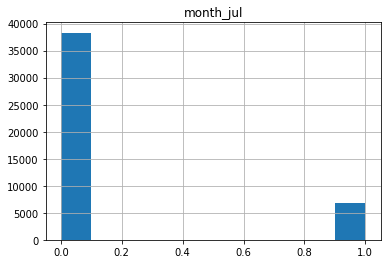

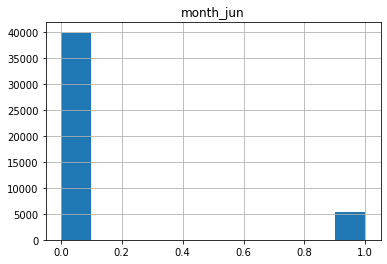

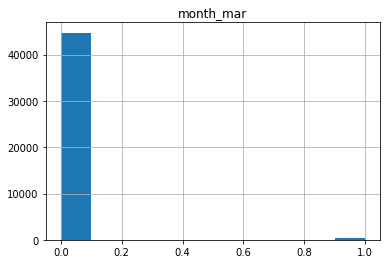

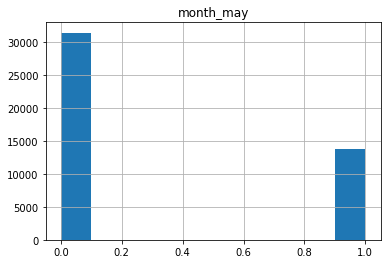

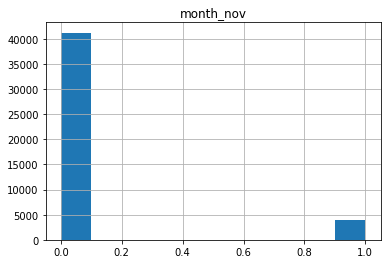

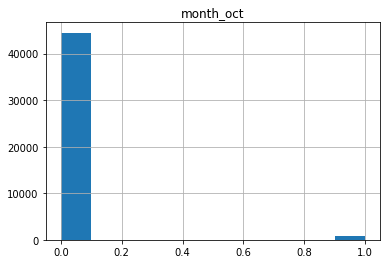

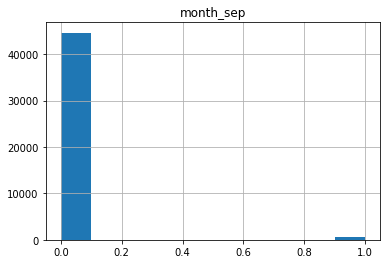

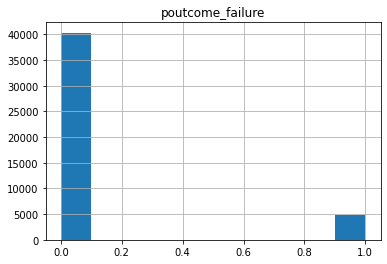

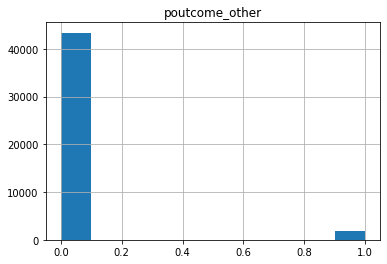

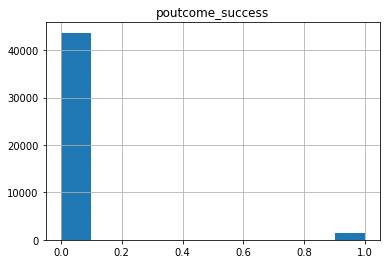

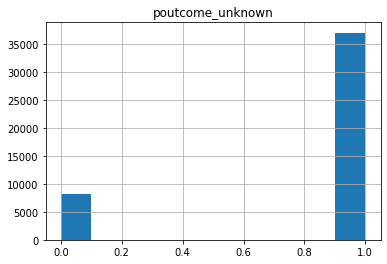

In [ ]:
for i in dummied_new_df.columns:
    dummied_new_df[i].hist()
    plt.title(i)
    plt.show()

In [ ]:
#df=pd.read_csv('bank-full.csv',sep=';').set_index('y')
df=pd.read_csv(file_path,sep=';')
df['y']=df['y'].replace({'no': '0', 'yes': '1'})
df=df.drop(['balance'],axis=1)
df

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df.describe()

,age,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
dummied_new_df=pd.get_dummies(df,columns=categorical_columns)

dummied_new_df

,age,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
import os, time
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=dummied_new_df.columns
scaled_data.index=dummied_new_df.index
scaled_data.to_csv('scaled_data.csv')
scaled_data

,age,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.133333,0.018707,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.533333,0.198658,0.032258,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.533333,0.092721,0.016129,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,0.533333,0.229158,0.064516,0.212156,0.010909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,0.533333,0.103294,0.048387,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x = scaled_data.drop(['y'],axis=1).copy()
y =scaled_data['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 5)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
sm = SMOTE(random_state=8) #SMOTE
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

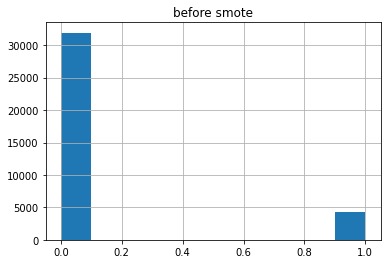

In [ ]:
q=pd.DataFrame(y_train)

q.hist()
plt.title('before smote')
plt.show()

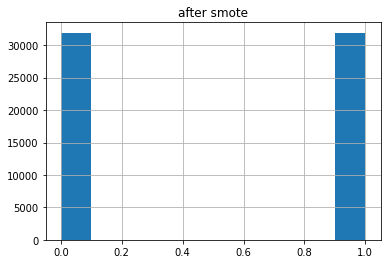

In [ ]:
q=pd.DataFrame(y_train_smote)
#q=q.replace({'no': 0, 'yes': 1})
q.hist()
plt.title('after smote')
plt.show()

In [ ]:
!pip install XGBOOST

In [ ]:
!!pip install scikit-plot

['Collecting scikit-plot',
 '  Downloading scikit_plot-0.3.7-py3-none-any.whl (33 kB)',
 'Requirement already satisfied: matplotlib>=1.4.0 in /usr/local/lib/python3.7/dist-packages (from scikit-plot) (3.2.2)',
 'Requirement already satisfied: joblib>=0.10 in /usr/local/lib/python3.7/dist-packages (from scikit-plot) (1.1.0)',
 'Requirement already satisfied: scipy>=0.9 in /usr/local/lib/python3.7/dist-packages (from scikit-plot) (1.4.1)',
 'Requirement already satisfied: scikit-learn>=0.18 in /usr/local/lib/python3.7/dist-packages (from scikit-plot) (1.0.1)',
 'Requirement already satisfied: numpy>=1.11 in /usr/local/lib/python3.7/dist-packages (from matplotlib>=1.4.0->scikit-plot) (1.19.5)',
 'Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib>=1.4.0->scikit-plot) (1.3.2)',
 'Requirement already satisfied: python-dateutil>=2.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib>=1.4.0->scikit-plot) (2.8.2)',
 'Requirement 

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

Accuracy: 0.86697 / F1 Score: 0.48612 / Recall: 0.54398 / Precision: 0.43938
Each fold f1: [0.80639525 0.9278083  0.92704843 0.92484932 0.92924492]
Average f1: 90.31 +/- 4.84
**** DecisionTree***


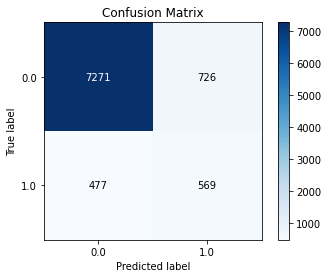

In [ ]:
# 4.1 Fit the model with DecisionTreeClassifier function

model=DecisionTreeClassifier(random_state=4)
model.fit(x_train_smote,y_train_smote)

y_hat=model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_hat)
f1_score = metrics.f1_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
print (f"Accuracy: {accuracy:.5f} / F1 Score: {f1_score:.5f} / Recall: {recall:.5f} / Precision: {precision:.5f}")
CV5F_acc=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='f1')
print('Each fold f1:',CV5F_acc)
print('Average f1:',round((np.mean(CV5F_acc))*100,2),'+/-',round((np.std(CV5F_acc))*100,2))
print('**** DecisionTree***')
plot_confusion_matrix(y_test, y_hat)

In [ ]:
from sklearn.metrics import f1_score
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 2, 128)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 128)
    max_leaf_nodes = int(trial.suggest_int("max_leaf_nodes", 2, 128))
    min_samples_leaf = int(trial.suggest_int('min_samples_leaf',2,128))
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
    DTC = DecisionTreeClassifier(min_samples_split = min_samples_split, 
                                max_leaf_nodes = max_leaf_nodes,
                                criterion = criterion,random_state=4)
    DTC.fit(x_train_smote,y_train_smote)
    return 1.0 - f1_score(y_test, DTC.predict(x_test))

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 4.9 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 209 kB 46.5 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 112 kB 54.8 MB/s 
     |████████████████████████████████| 149 kB 70.7 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=fd899be15d36a57e65bc345fb1ae03928b52370777ab83fb37f60017f2049977
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
study = optuna.create_study()
study.optimize(objective, n_trials =30)
print(study.best_params)
print(1.0 - study.best_value)

[I 2022-01-04 01:59:45,560] A new study created in memory with name: no-name-dedc78f7-a8e9-4118-a77f-32933ceb5f34
[I 2022-01-04 01:59:46,200] Trial 0 finished with value: 0.44922663080026903 and parameters: {'max_depth': 30, 'min_samples_split': 105, 'max_leaf_nodes': 48, 'min_samples_leaf': 29, 'criterion': 'entropy'}. Best is trial 0 with value: 0.44922663080026903.
[I 2022-01-04 01:59:46,824] Trial 1 finished with value: 0.4390896921017402 and parameters: {'max_depth': 66, 'min_samples_split': 6, 'max_leaf_nodes': 66, 'min_samples_leaf': 105, 'criterion': 'entropy'}. Best is trial 1 with value: 0.4390896921017402.
[I 2022-01-04 01:59:47,339] Trial 2 finished with value: 0.44818024263431544 and parameters: {'max_depth': 60, 'min_samples_split': 77, 'max_leaf_nodes': 25, 'min_samples_leaf': 98, 'criterion': 'entropy'}. Best is trial 1 with value: 0.4390896921017402.
[I 2022-01-04 01:59:48,003] Trial 3 finished with value: 0.41347150259067367 and parameters: {'max_depth': 51, 'min_samp

{'max_depth': 115, 'min_samples_split': 55, 'max_leaf_nodes': 127, 'min_samples_leaf': 23, 'criterion': 'entropy'}
0.5946734768332725


In [ ]:
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
import plotly.express as plotly
plotly_config = {"staticPlot": True}

fig = plot_optimization_history(study)
fig.show(config=plotly_config)
fig = plot_param_importances(study)
fig.show(config=plotly_config)

In [ ]:
plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
import plotly.express as plotly

fig = plot_optimization_history(study)
fig.show(config=plotly_config)
fig = plot_param_importances(study)
fig.show(config=plotly_config)

NameError: ignored

Accuracy: 0.86465 / F1 Score: 0.57880 / Recall: 0.80402 / Precision: 0.45215
Each fold f1: [0.8109355  0.89905667 0.89457109 0.89373543 0.89497164]
Average f1: 87.87 +/- 3.39
**** DecisionTree***


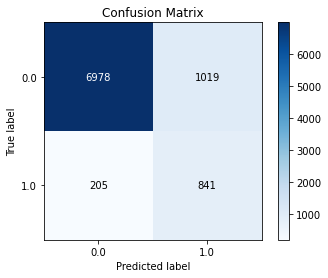

In [ ]:
# 4.1 Fit the model with DecisionTreeClassifier function
model=DecisionTreeClassifier(max_depth=study.best_params['max_depth'],
                             min_samples_split=study.best_params['min_samples_split'],
                             max_leaf_nodes=study.best_params['max_leaf_nodes']
                             ,min_samples_leaf=study.best_params['min_samples_leaf']
                             ,criterion=study.best_params['criterion'],random_state=4)
model.fit(x_train_smote,y_train_smote)
y_hat=model.predict(x_test)
accuracy= metrics.accuracy_score(y_test, y_hat)
f1_score = metrics.f1_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
print (f"Accuracy: {accuracy:.5f} / F1 Score: {f1_score:.5f} / Recall: {recall:.5f} / Precision: {precision:.5f}")
CV5F_acc=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='f1')
print('Each fold f1:',CV5F_acc)
print('Average f1:',round((np.mean(CV5F_acc))*100,2),'+/-',round((np.std(CV5F_acc))*100,2))
print('**** DecisionTree***')
plot_confusion_matrix(y_test, y_hat)

findfont: Font family ['DFKai-sb'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DFKai-sb'] not found. Falling back to DejaVu Sans.


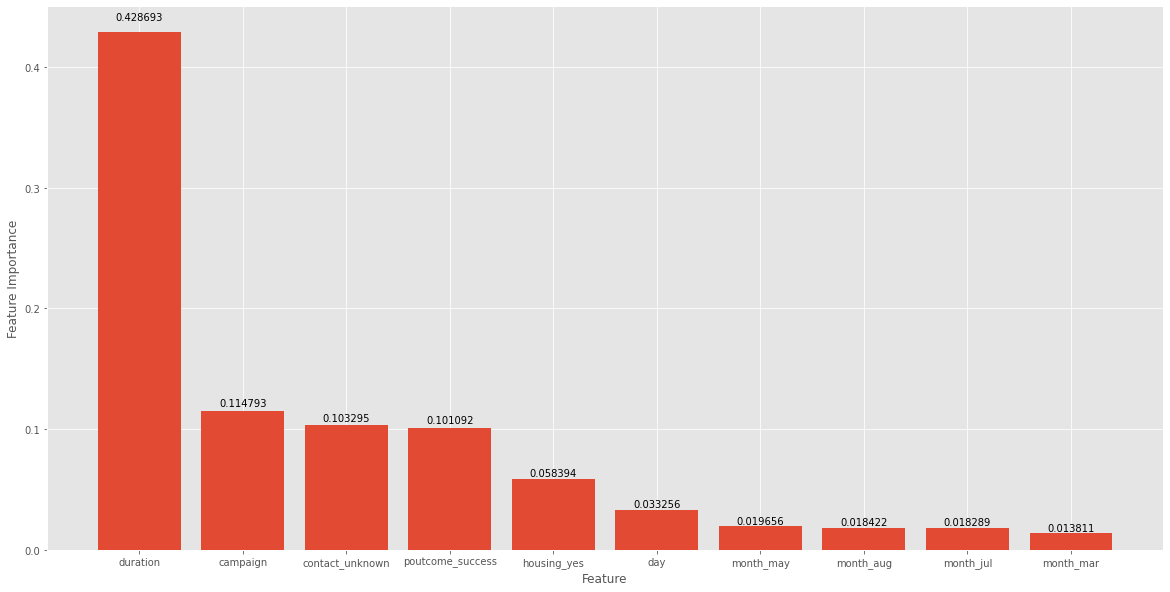

In [ ]:
#由於變數過多此只畫出前十名
import matplotlib.pyplot as plt
#DataFrame轉串列
df=dummied_new_df.copy()
feature_names= df.drop(['y'],axis=1).keys().tolist()
model.feature_importances_.tolist() 
a=model.feature_importances_.tolist() 

df_ipt = pd.DataFrame({'feature':feature_names,  
                   'feature_importance':model.feature_importances_.tolist()}) 
df_ipt = df_ipt.sort_values(by=['feature_importance'], ascending=False).reset_index(drop=True) 
df10=df_ipt.iloc[:10]

def autolabel(rects): 
    for rect in rects: 
        height = rect.get_height() 
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height), 
                 ha='center', va='bottom') 

plt.style.use('ggplot') 
fig = plt.figure(figsize=(20, 10)) 
plt.rcParams['font.family'] = 'DFKai-sb'  #標楷體 
gini = plt.bar(df10.index, df10['feature_importance'], align='center') 
plt.xlabel('Feature')  #X軸名稱 
plt.ylabel('Feature Importance')  #Y軸名稱  
plt.xticks(df10.index, df10['feature'],fontsize=10)  #X軸項目名稱 

autolabel(gini) 

plt.show() 

In [ ]:
feature_10=df10['feature'].tolist()
df_x_train=pd.DataFrame(x_train_smote)
df_x_train.columns=x.columns
newdf=pd.DataFrame()
for i in feature_10:
    newdf[i]=df_x_train[i]
new_xtrain=np.array(newdf.copy())
newdf

,duration,campaign,contact_unknown,poutcome_success,housing_yes,day,month_may,month_aug,month_jul,month_mar
0,0.023383,0.016129,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.0
1,0.039854,0.016129,0.0,0.0,0.0,0.633333,0.000000,1.000000,0.000000,0.0
2,0.204351,0.064516,0.0,1.0,0.0,0.966667,0.000000,0.000000,1.000000,0.0
3,0.056934,0.032258,0.0,0.0,1.0,0.333333,0.000000,1.000000,0.000000,0.0
4,0.064864,0.000000,1.0,0.0,1.0,0.233333,1.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
63845,0.126947,0.004834,0.0,0.0,1.0,0.176656,1.000000,0.000000,0.000000,0.0
63846,0.077241,0.071607,0.0,0.0,0.0,0.197539,0.634229,0.365771,0.000000,0.0
63847,0.028186,0.000000,0.0,0.0,0.0,0.346009,0.000000,0.000000,0.000000,0.0
63848,0.134117,0.005409,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.335376,0.0


In [ ]:
df_x_test=pd.DataFrame(x_test)
df_x_test.columns=x.columns
newdf_test=pd.DataFrame()
for i in feature_10:
    newdf_test[i]=df_x_test[i]
newdf_test=np.array(newdf_test.copy())
newdf_test

array([[0.02399349, 0.08064516, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00427003, 0.08064516, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02968686, 0.0483871 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.03741358, 0.0483871 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24400163, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01179341, 0.01612903, 0.        , ..., 0.        , 1.        ,
        0.        ]])

＃smote 做 XG　ｌｉｇｈｔｂｇｍ

In [ ]:
from sklearn import metrics
from scikitplot.metrics import plot_confusion_matrix
classifier = XGBClassifier(max_depth=6, learning_rate=1.0, n_estimators=100, colsample_bytree=0.8,
                           tree_method='gpu_hist', max_bin=16, predictor='gpu_predictor', nthread=8, n_gpus=1)
classifier = classifier.fit(x_train_smote,y_train_smote)
y_hat = classifier.predict(x_test)
# classifier.oob_score_
accuracy = metrics.accuracy_score(y_test, y_hat)
f1_score = metrics.f1_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
print (f"Accuracy: {accuracy:.5f} / F1 Score: {f1_score:.5f} / Recall: {recall:.5f} / Precision: {precision:.5f}")
print('****XG_BOOST***')
plot_confusion_matrix(y_test, y_hat)

import lightgbm as lgb
from lightgbm import LGBMClassifier
classifier = lgb.LGBMClassifier(objective = 'binary', 
                                learning_rate = 0.05, 
                                n_estimators = 100, 
                                random_state=0)
classifier.fit(x_train_smote,y_train_smote)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scikitplot.metrics import plot_confusion_matrix
y_hat= y_pred
accuracy = metrics.accuracy_score(y_test, y_hat)
f1_score = metrics.f1_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
print (f"Accuracy: {accuracy:.5f} / F1 Score: {f1_score:.5f} / Recall: {recall:.5f} / Precision: {precision:.5f}")
print('**** lightgbm***')
plot_confusion_matrix(y_test, y_hat)

XGBoostError: ignored

＃用ｔｒｅｅ　保留十個變數

In [ ]:
from sklearn import metrics
from scikitplot.metrics import plot_confusion_matrix
classifier = XGBClassifier(max_depth=6, learning_rate=1.0, n_estimators=100, colsample_bytree=0.8,
                           tree_method='gpu_hist', max_bin=16, predictor='gpu_predictor', nthread=8, n_gpus=1)
classifier = classifier.fit(new_xtrain,y_train_smote)
y_hat = classifier.predict(newdf_test)
# classifier.oob_score_
accuracy = metrics.accuracy_score(y_test, y_hat)
f1_score = metrics.f1_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
print (f"Accuracy: {accuracy:.5f} / F1 Score: {f1_score:.5f} / Recall: {recall:.5f} / Precision: {precision:.5f}")
print('****XG_BOOST***')
plot_confusion_matrix(y_test, y_hat)

import lightgbm as lgb
from lightgbm import LGBMClassifier
classifier = lgb.LGBMClassifier(objective = 'binary', 
                                learning_rate = 0.05, 
                                n_estimators = 100, 
                                random_state=0)
classifier.fit(new_xtrain,y_train_smote)
y_pred = classifier.predict(newdf_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scikitplot.metrics import plot_confusion_matrix
y_hat= y_pred
accuracy = metrics.accuracy_score(y_test, y_hat)
f1_score = metrics.f1_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
print (f"Accuracy: {accuracy:.5f} / F1 Score: {f1_score:.5f} / Recall: {recall:.5f} / Precision: {precision:.5f}")
print('**** lightgbm***')
plot_confusion_matrix(y_test, y_hat)

In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
input_features=x.shape[1]
print('Amount of features:',input_features)

In [ ]:
clear.clear_session()
# Create input layer
inputs = keras.Input(shape=(input_features,))
# Create first hidden layer
hidden_layer_1 = Dense(units=input_features*2, activation='relu')(inputs) 
# Create second hidden layer
hidden_layer_2 = Dense(units=input_features*4, activation='relu')(hidden_layer_1)
# Create output layer
outputs = Dense(units=1, activation='sigmoid')(hidden_layer_2)
classic_style_ANN = keras.Model(inputs=inputs, outputs=outputs, name='classic_style')
opt=Adam(learning_rate=0.001)
classic_style_ANN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
classic_style_ANN.summary()

In [ ]:
# 7.1 Store in the history for more useful information
history=classic_style_ANN.fit(x_train_smote, y_train_smote, epochs=100, batch_size=64,verbose=1,validation_split=0.2)

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10))
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [ ]:
input_features=x.shape[1]
print('Amount of features:',input_features)

In [ ]:
input_features=x.shape[1]
print('Amount of features:',input_features)
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=input_features*2, input_dim=input_features, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=input_features*4, activation='relu'))
model.add(Dense(units=input_features*4*2, activation='relu'))
model.add(Dense(units=input_features*4*4, activation='relu'))
# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Net
opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()
# 7.1 Store in the history for more useful information
history=model.fit(x_train_smote, y_train_smote, epochs=100, batch_size=64,verbose=1,validation_split=0.2)
modeling_result=history.history
modeling_result.keys()
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10))
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [ ]:
# Training result
training_prediction=(model.predict_on_batch(x_train_smote) > 0.5).astype('int')
# Testing result
testing_prediction=(model.predict_on_batch(x_test) > 0.5).astype('int')
# Accuracy
training_acc=accuracy_score(y_train_smote,training_prediction)
# f1 score
#training_f1s=f1_score(y_train_smote,training_prediction)
# precision
training_pre=precision_score(y_train_smote,training_prediction)
#sensitivity
training_sen=sensitivity_score(y_train_smote,training_prediction)
#specificity
training_spe=specificity_score(y_train_smote,training_prediction)
#confusion matrix
training_cm=confusion_matrix(y_train_smote,training_prediction)

testing_acc=accuracy_score(y_test,testing_prediction)
#testing_f1s=f1_score(y_test,testing_prediction)
testing_pre=precision_score(y_test,testing_prediction)
testing_sen=sensitivity_score(y_test,testing_prediction)
testing_spe=specificity_score(y_test,testing_prediction)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('With scaling')
print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
#print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
#print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

In [ ]:
input_features=newdf.shape[1]
print('Amount of features:',input_features)
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=input_features*2, input_dim=input_features, activation='relu'))

# 6.3 Add second hidden layer
#model.add(Dense(units=input_features*4, activation='relu'))
# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Net
opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# Finally check the model 
model.summary()
# 7.1 Store in the history for more useful information
history=model.fit(new_xtrain, y_train_smote, epochs=100, batch_size=1280,verbose=1,validation_split=0.2)
modeling_result=history.history
modeling_result.keys()
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10))
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [ ]:
testing_prediction=(model.predict_on_batch(newdf_test) > 0.5).astype('int')
testing_prediction

In [ ]:
# Training result
training_prediction=(model.predict_on_batch(new_xtrain) > 0.5).astype('int')
# Testing result
testing_prediction=(model.predict_on_batch(newdf_test) > 0.5).astype('int')
# Accuracy
training_acc=accuracy_score(y_train_smote,training_prediction)
# f1 score
#training_f1s=f1_score(y_train_smote,training_prediction)
# precision
training_pre=precision_score(y_train_smote,training_prediction)
#sensitivity
training_sen=sensitivity_score(y_train_smote,training_prediction)
#specificity
training_spe=specificity_score(y_train_smote,training_prediction)
#confusion matrix
training_cm=confusion_matrix(y_train_smote,training_prediction)

testing_acc=accuracy_score(y_test,testing_prediction)
#testing_f1s=f1_score(y_test,testing_prediction)
testing_pre=precision_score(y_test,testing_prediction)
testing_sen=sensitivity_score(y_test,testing_prediction)
testing_spe=specificity_score(y_test,testing_prediction)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('With scaling')
print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
#print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
#print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

In [ ]:
# 6.3 Fit the model with KNeighborsClassifier function
from sklearn.neighbors import KNeighborsClassifier
scaling_model=KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='minkowski',p=2)##, n_jobs=-1)
scaling_model.fit(x_train_smote, y_train_smote)

In [ ]:
# 6.4 Show result: out-of-sample testing
# Training result
training_prediction=scaling_model.predict(x_train_smote)
# Testing result
testing_prediction=scaling_model.predict(x_test)

In [ ]:

# Accuracy
training_acc=accuracy_score(y_train_smote,training_prediction)
# f1 score
#training_f1s=f1_score(y_train_smote,training_prediction)
# precision
training_pre=precision_score(y_train_smote,training_prediction)
#sensitivity
training_sen=sensitivity_score(y_train_smote,training_prediction)
#specificity
training_spe=specificity_score(y_train_smote,training_prediction)
#confusion matrix
training_cm=confusion_matrix(y_train_smote,training_prediction)

testing_acc=accuracy_score(y_test,testing_prediction)
#testing_f1s=f1_score(y_test,testing_prediction)
testing_pre=precision_score(y_test,testing_prediction)
testing_sen=sensitivity_score(y_test,testing_prediction)
testing_spe=specificity_score(y_test,testing_prediction)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('With scaling')
print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
#print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
#print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

In [ ]:
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
import plotly.express as plotly
plotly_config = {"staticPlot": True}

fig = plot_optimization_history(study)
fig.show(config=plotly_config)
fig = plot_param_importances(study)
fig.show(config=plotly_config)